In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

In [2]:
df = pd.read_csv('Employee_Salaries.csv')
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,111024.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,114780.0,NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,43.72


In [3]:
df.shape

(33586, 8)

In [4]:
df.drop(columns=['Typical Hours', 'Hourly Rate'], inplace=True)
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,101442.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,94122.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,111024.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,114780.0
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,NaN


In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(25638, 6)

### Countplot: Department

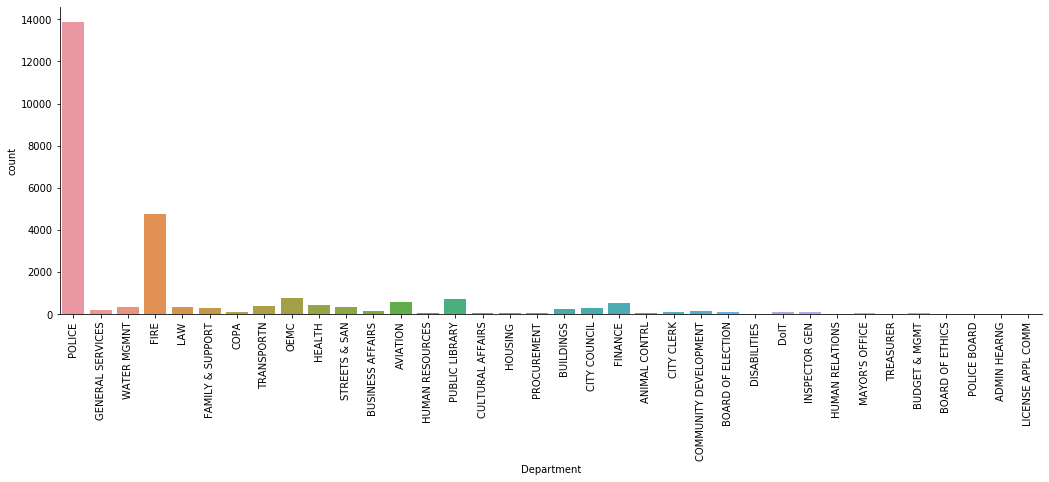

In [7]:
g = sns.catplot(data=df, x='Department', aspect=3, kind='count')
g.set_xticklabels(rotation=90)

### Value_counts: Department

In [8]:
df['Department'].value_counts()

POLICE                   13895
FIRE                      4774
OEMC                       777
PUBLIC LIBRARY             723
AVIATION                   590
FINANCE                    525
HEALTH                     464
TRANSPORTN                 388
LAW                        361
WATER MGMNT                357
STREETS & SAN              333
FAMILY & SUPPORT           308
CITY COUNCIL               279
BUILDINGS                  261
GENERAL SERVICES           196
BUSINESS AFFAIRS           157
COMMUNITY DEVELOPMENT      150
COPA                       120
BOARD OF ELECTION          113
DoIT                        98
INSPECTOR GEN               90
CITY CLERK                  89
PROCUREMENT                 83
MAYOR'S OFFICE              80
HUMAN RESOURCES             76
HOUSING                     64
CULTURAL AFFAIRS            63
ANIMAL CONTRL               63
BUDGET & MGMT               43
ADMIN HEARNG                36
DISABILITIES                28
TREASURER                   25
HUMAN RE

### 100-nál kisebb gyakoriságú osztályok 'Other' osztályba sorolása

In [9]:
keves = {}
keves = set(keves)

for k, v in dict(df['Department'].value_counts()).items():
    if (v < 100):
        keves.add(k)
        
keves

{'ADMIN HEARNG',
 'ANIMAL CONTRL',
 'BOARD OF ETHICS',
 'BUDGET & MGMT',
 'CITY CLERK',
 'CULTURAL AFFAIRS',
 'DISABILITIES',
 'DoIT',
 'HOUSING',
 'HUMAN RELATIONS',
 'HUMAN RESOURCES',
 'INSPECTOR GEN',
 'LICENSE APPL COMM',
 "MAYOR'S OFFICE",
 'POLICE BOARD',
 'PROCUREMENT',
 'TREASURER'}

In [10]:
for row in df.itertuples():
    if(getattr(row, 'Department') in keves):
        df.at[getattr(row, 'Index'), 'Department'] = 'OTHER'

In [11]:
df['Department'].value_counts()

POLICE                   13895
FIRE                      4774
OTHER                      867
OEMC                       777
PUBLIC LIBRARY             723
AVIATION                   590
FINANCE                    525
HEALTH                     464
TRANSPORTN                 388
LAW                        361
WATER MGMNT                357
STREETS & SAN              333
FAMILY & SUPPORT           308
CITY COUNCIL               279
BUILDINGS                  261
GENERAL SERVICES           196
BUSINESS AFFAIRS           157
COMMUNITY DEVELOPMENT      150
COPA                       120
BOARD OF ELECTION          113
Name: Department, dtype: int64

### Value_counts: Department

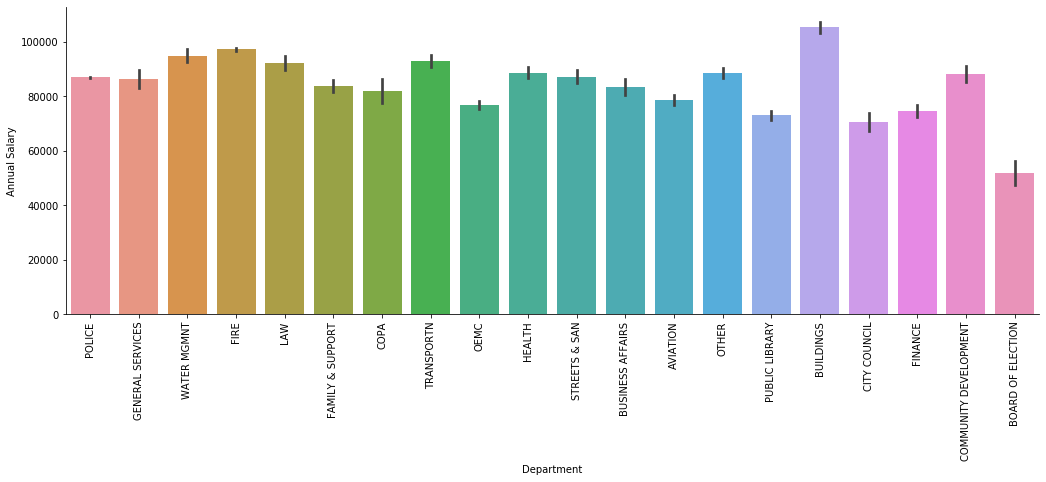

In [12]:
g = sns.catplot(data=df, x='Department', y='Annual Salary', kind='bar', aspect=3)
g.set_xticklabels(rotation=90)